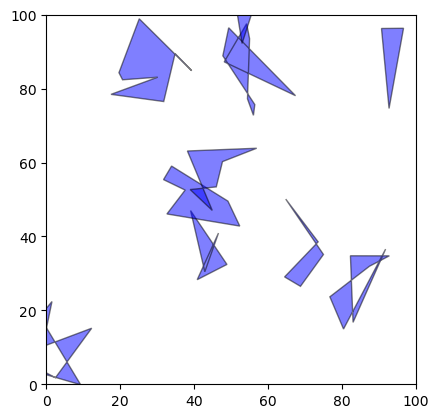

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.affinity import scale

# Function to generate a random polygon
def random_polygon(center, size_range):
    # Randomly choose the number of vertices, at least 3 and at most 9
    num_vertices = np.random.randint(3, 10)
    points = []
    for _ in range(num_vertices):
        # Randomly choose an angle and radius
        angle = np.random.uniform(0, 2 * np.pi)
        radius = np.random.uniform(size_range[0], size_range[1])
        # Calculate the coordinates of the vertex
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        points.append((x, y))
    # Create and return the polygon object
    return Polygon(points)

# Function to plot a polygon
def plot_polygon(polygon, ax, color='blue'):
    # Get the boundary coordinates of the polygon
    x, y = polygon.exterior.xy
    # Fill the polygon on the plot
    ax.fill(x, y, alpha=0.5, fc=color, ec='black')

# Function to generate obstacles
def generate_obstacles(num_obstacles, x_range, y_range, size_range):
    obstacles = []
    for _ in range(num_obstacles):
        # Randomly choose the center point of the obstacle
        center = (np.random.uniform(*x_range), np.random.uniform(*y_range))
        # Generate a random polygon obstacle
        polygon = random_polygon(center, size_range)
        obstacles.append(polygon)
    return obstacles

# Parameter settings
num_obstacles = 10 # Number of obstacles
x_range = (0, 100) # Range of x coordinates on the plane
y_range = (0, 100) # Range of y coordinates on the plane
size_range = (5, 15) # Size range of obstacles (radius)

# Randomly generate obstacles
obstacles = generate_obstacles(num_obstacles, x_range, y_range, size_range)

# Plot the obstacles
fig, ax = plt.subplots()
for obs in obstacles:
    plot_polygon(obs, ax)

# Set the range and aspect ratio of the plot
ax.set_xlim(x_range)
ax.set_ylim(y_range)
ax.set_aspect('equal', adjustable='box')
plt.show()
